

In this example, we will use an autoencoder to 'learn' to recrate hand written digits.

In [34]:
import numpy as np
from tensorflow import keras

## Load  mnist dataset

### Load and normalize our data

In [35]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


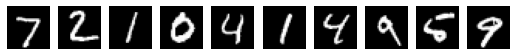

In [36]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

## Load the data

In [41]:
import tensorflow as tf

from tensorflow.keras.preprocessing import image

i1 = tf.keras.utils.load_img('Image1.png', target_size=(28,28),color_mode= "grayscale")
i2 = tf.keras.utils.load_img('Image2.png', target_size=(28,28),color_mode= "grayscale")
i3 = tf.keras.utils.load_img('Image3.png', target_size=(28,28),color_mode= "grayscale")
i4 = tf.keras.utils.load_img('Image4.png', target_size=(28,28),color_mode= "grayscale")
i5 = tf.keras.utils.load_img('Image5.png', target_size=(28,28),color_mode= "grayscale")

In [42]:
new_images = np.vstack([i1,i2,i3,i4,i5])
test_i = new_images.reshape(-1,784)
train_i = new_images.reshape(-1,784) 
train_i = train_i.astype('float32') / 255
test_i = test_i.astype('float32') / 255

In [43]:
train_i.shape

(5, 784)

## Oversampling the data

In [44]:
train_i = np.repeat(train_i[:],20, axis =0)

In [45]:
train_i.shape

(100, 784)

<function matplotlib.pyplot.show(close=None, block=None)>

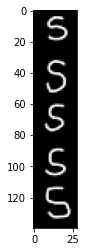

In [46]:
plt.imshow(new_images,cmap="gray")
ax.axis('off')
plt.show

## Create autoencoder model

In [47]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 16 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               392500    
                                                                 
 dense_9 (Dense)             (None, 300)               150300    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 16)                1616      
                                                                 
 dense_12 (Dense)            (None, 100)               1700      
                                                                 
 dense_13 (Dense)            (None, 300)               30300     
                                                                 
 dense_14 (Dense)            (None, 500)              

In [48]:
## train the autoencoder model

In [49]:
from tensorflow.keras.callbacks import EarlyStopping 

# EarlyStopping during model training

In [50]:
new_image_set=train_images[:20000]
for i in range(len(train_i)):
    input_arr = train_i[i]
    input_arr = input_arr.reshape(784)
    np.random.shuffle(train_i)
 
    bad_images= np.repeat(input_arr.reshape(-1,1,28,28), 135, axis=1). reshape(-1, 784)
    new_image_set= np.concatenate((new_image_set, bad_images))
    np.random.shuffle(new_image_set)
new_images_train = new_image_set[int(len(new_image_set)*.8):]
new_images_test = new_image_set[int(len(new_image_set)*.2):]
    

In [51]:
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=new_images_train,
    y=new_images_train,
    epochs=15,
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)  

Epoch 1/15
53/53 [==============================] - 4s 47ms/step - loss: 0.3161 - val_loss: 0.2099
Epoch 2/15
53/53 [==============================] - 2s 38ms/step - loss: 0.1867 - val_loss: 0.1691
Epoch 3/15
53/53 [==============================] - 2s 43ms/step - loss: 0.1593 - val_loss: 0.1493
Epoch 4/15
53/53 [==============================] - 2s 33ms/step - loss: 0.1399 - val_loss: 0.1327
Epoch 5/15
53/53 [==============================] - 2s 35ms/step - loss: 0.1279 - val_loss: 0.1241
Epoch 6/15
53/53 [==============================] - 2s 42ms/step - loss: 0.1205 - val_loss: 0.1181
Epoch 7/15
53/53 [==============================] - 2s 43ms/step - loss: 0.1154 - val_loss: 0.1146
Epoch 8/15
53/53 [==============================] - 2s 41ms/step - loss: 0.1118 - val_loss: 0.1114
Epoch 9/15
53/53 [==============================] - 2s 40ms/step - loss: 0.1093 - val_loss: 0.1097
Epoch 10/15
53/53 [==============================] - 2s 44ms/step - loss: 0.1072 - val_loss: 0.1081
Epoch 11/

313/313 [==============================] - 1s 4ms/step


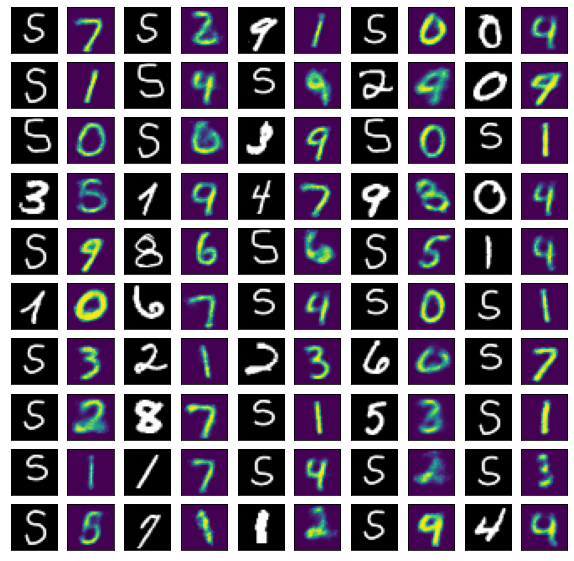

In [52]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(new_images_test[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()